In [1]:
#improting nessacery libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import scikitplot as skplt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV

HepaC = pd.read_csv('HepatitisCdata.csv')
style.use("fivethirtyeight")

# Preproccesing

In [2]:
HepaC.head()

Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7

In [3]:
HepaC.shape

(615, 14)

In [4]:
HepaC.describe()

Unnamed: 0         Age         ALB         ALP         ALT         AST  \
count  615.000000  615.000000  614.000000  597.000000  614.000000  615.000000   
mean   308.000000   47.408130   41.620195   68.283920   28.450814   34.786341   
std    177.679487   10.055105    5.780629   26.028315   25.469689   33.090690   
min      1.000000   19.000000   14.900000   11.300000    0.900000   10.600000   
25%    154.500000   39.000000   38.800000   52.500000   16.400000   21.600000   
50%    308.000000   47.000000   41.950000   66.200000   23.000000   25.900000   
75%    461.500000   54.000000   45.200000   80.100000   33.075000   32.900000   
max    615.000000   77.000000   82.200000  416.600000  325.300000  324.000000   

              BIL         CHE        CHOL         CREA         GGT        PROT  
count  615.000000  615.000000  605.000000   615.000000  615.000000  614.000000  
mean    11.396748    8.196634    5.368099    81.287805   39.533171   72.044137  
std     19.673150    2.205657    1.132728    49.756166   54.661071    5.402636  
min      0.800000    1.420000    1.430000     8.000000    4.500000   44.800000  
25%      5.300000    6.935000    4.610000    67.000000   15.700000   69.300000  
50%      7.300000    8.260000    5.300000    77.000000   23.300000   72.200000  
75%     11.200000    9.590000    6.060000    88.000000   40.200000   75.400000  
max    254.000000   16.410000    9.670000  1079.100000  650.900000   90.000000

In [5]:
duplicaterows = HepaC[HepaC.duplicated()]
duplicaterows

Empty DataFrame
Columns: [Unnamed: 0, Category, Age, Sex, ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT]
Index: []

In [6]:
#dropping "unnamed: 0" column
HepaC.drop(["Unnamed: 0"],axis=1,inplace = True)

In [7]:
HepaC.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [8]:
#dealing with null entries
HepaC[["ALP"]]=HepaC[["ALP"]].fillna(HepaC[["ALP"]].median()) #replacing with median value
HepaC[["CHOL"]]=HepaC[["CHOL"]].fillna(HepaC[["CHOL"]].median())

HepaC.dropna(subset = ["ALB","ALT","PROT" ], inplace = True) #dropping ALB,ALT,PROT missing row

In [9]:
HepaC.isnull().sum().sum()

0

In [10]:
#replacing categorical data
HepaC['Sex'].replace(['m','f'],[1,0],inplace=True)
HepaC['Sex'].value_counts()

1    374
0    238
Name: Sex, dtype: int64

In [11]:
replace_dict = dict()
num_dict = dict()
i=0
for val in HepaC['Category'].unique():
    replace_dict[val] = i
    num_dict[str(i)] = val
    i += 1

In [12]:
HepaC['Category'].replace(replace_dict,inplace=True)
HepaC.Category.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [13]:
HepaC['Category'].value_counts()

0    533
4     28
2     23
3     21
1      7
Name: Category, dtype: int64

In [14]:
HepaC.head()

Category  Age  Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA   GGT  \
0         0   32    1  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0  12.1   
1         0   32    1  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0  15.6   
2         0   32    1  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0  33.2   
3         0   32    1  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0  33.8   
4         0   32    1  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0  29.9   

   PROT  
0  69.0  
1  76.5  
2  79.3  
3  75.7  
4  68.7

In [15]:
HepaC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  612 non-null    int64  
 1   Age       612 non-null    int64  
 2   Sex       612 non-null    int64  
 3   ALB       612 non-null    float64
 4   ALP       612 non-null    float64
 5   ALT       612 non-null    float64
 6   AST       612 non-null    float64
 7   BIL       612 non-null    float64
 8   CHE       612 non-null    float64
 9   CHOL      612 non-null    float64
 10  CREA      612 non-null    float64
 11  GGT       612 non-null    float64
 12  PROT      612 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 66.9 KB


In [16]:
X = HepaC.drop('Category',axis=1)
y = HepaC['Category']
print("X shape ",X.shape)
print("y shape ",y.shape)

X shape  (612, 12)
y shape  (612,)


# Analysis & Visualize Data

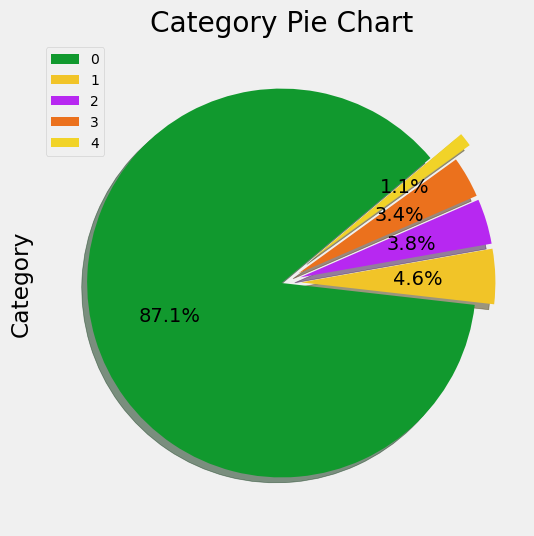

In [17]:
# understanding the target column
explode_list = [0, 0.1, 0.1, 0.1, 0.2]
colour = ["#11992E","#F1C428", "#B728F1","#EB711D","#F1D328"]
plt.figure(figsize=(6,6))
HepaC['Category'].value_counts().plot(kind='pie',
                                      autopct='%1.1f%%', 
                                      shadow=True,
                                      startangle=40,
                                      colors = colour,
                                      labels = None,
                                      explode=explode_list)
plt.title('Category Pie Chart')
plt.legend(labels=HepaC.index, loc='upper left', fontsize=10) 
plt.show()

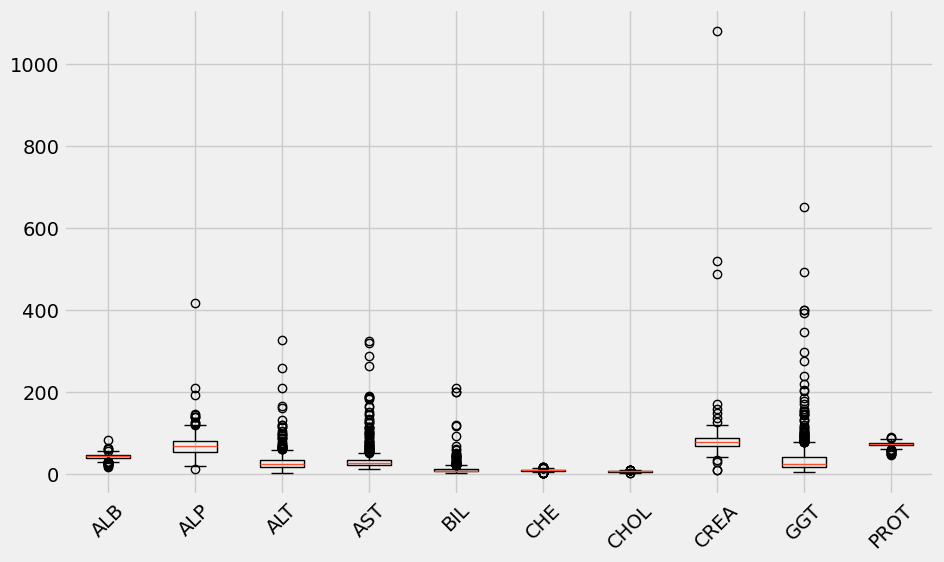

In [18]:
columns_to_plot = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

plt.figure(figsize=(10,6))
plt.boxplot(HepaC[columns_to_plot].values, labels=columns_to_plot, showfliers=True)
plt.xticks(rotation=45)
plt.show()

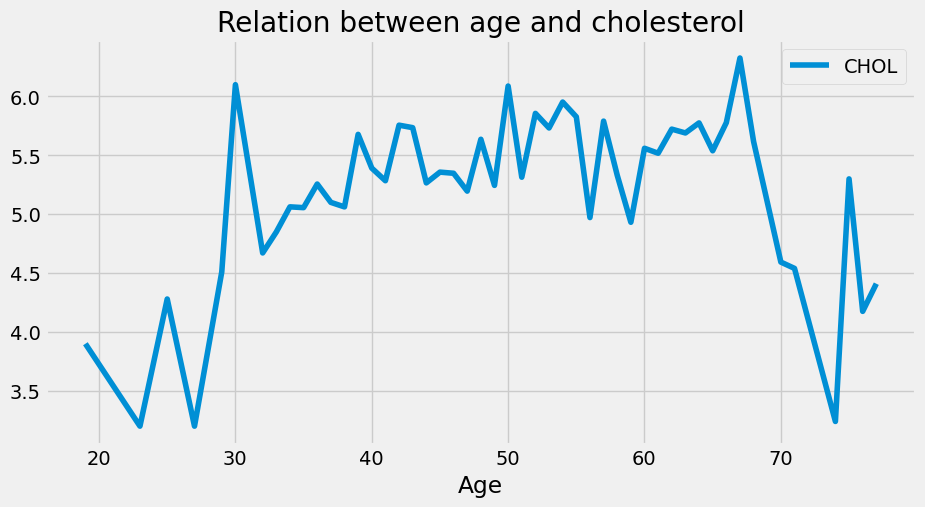

In [19]:
df_group= HepaC[['Age','CHOL']]
df_age = df_group.groupby(['Age'],as_index=False).mean()
df_age.plot(kind = 'line', x ='Age', y = 'CHOL',figsize=(10, 5))
plt.title('Relation between age and cholesterol')
plt.show()

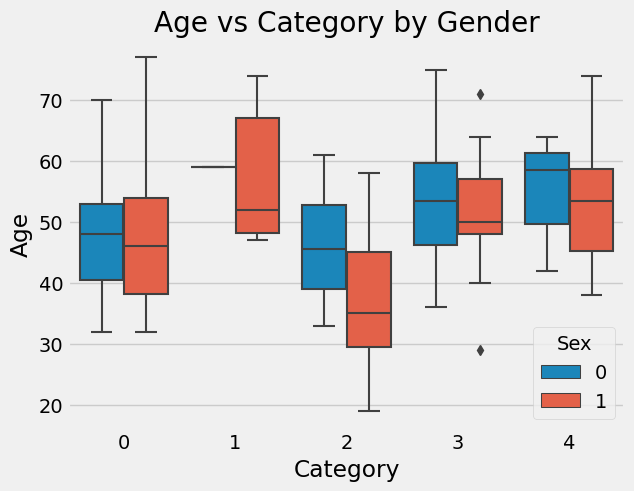

In [20]:
sns.boxplot(x="Category", y="Age", hue="Sex",data=HepaC,linewidth=1.5)
plt.title('Age vs Category by Gender')
plt.show()

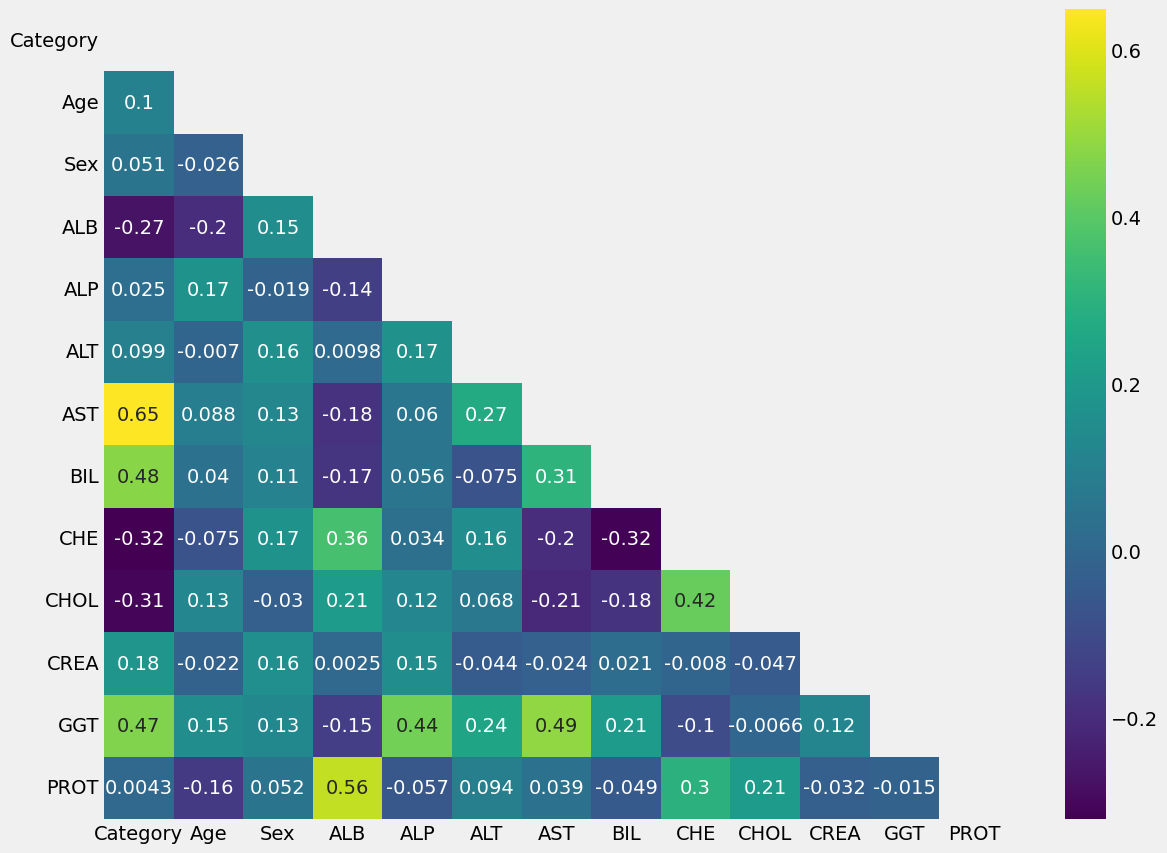

In [21]:
corr_matrix = HepaC.corr()
mask = np.triu(corr_matrix)
plt.figure(figsize = (13,10))
sns.heatmap(corr_matrix, annot = True, cmap = "viridis", mask = mask)
plt.show()

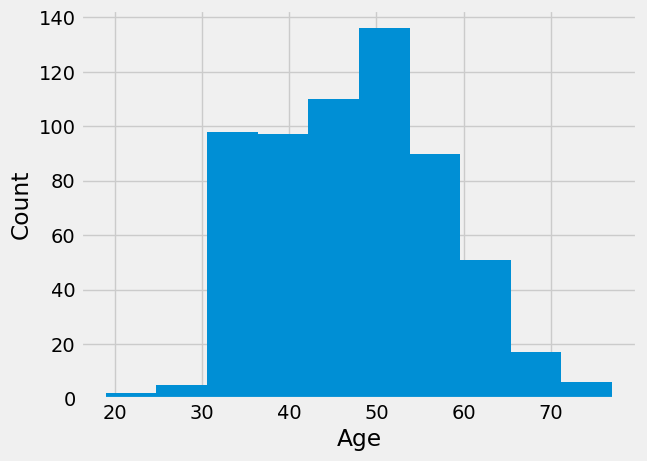

In [22]:
plt.hist(HepaC['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

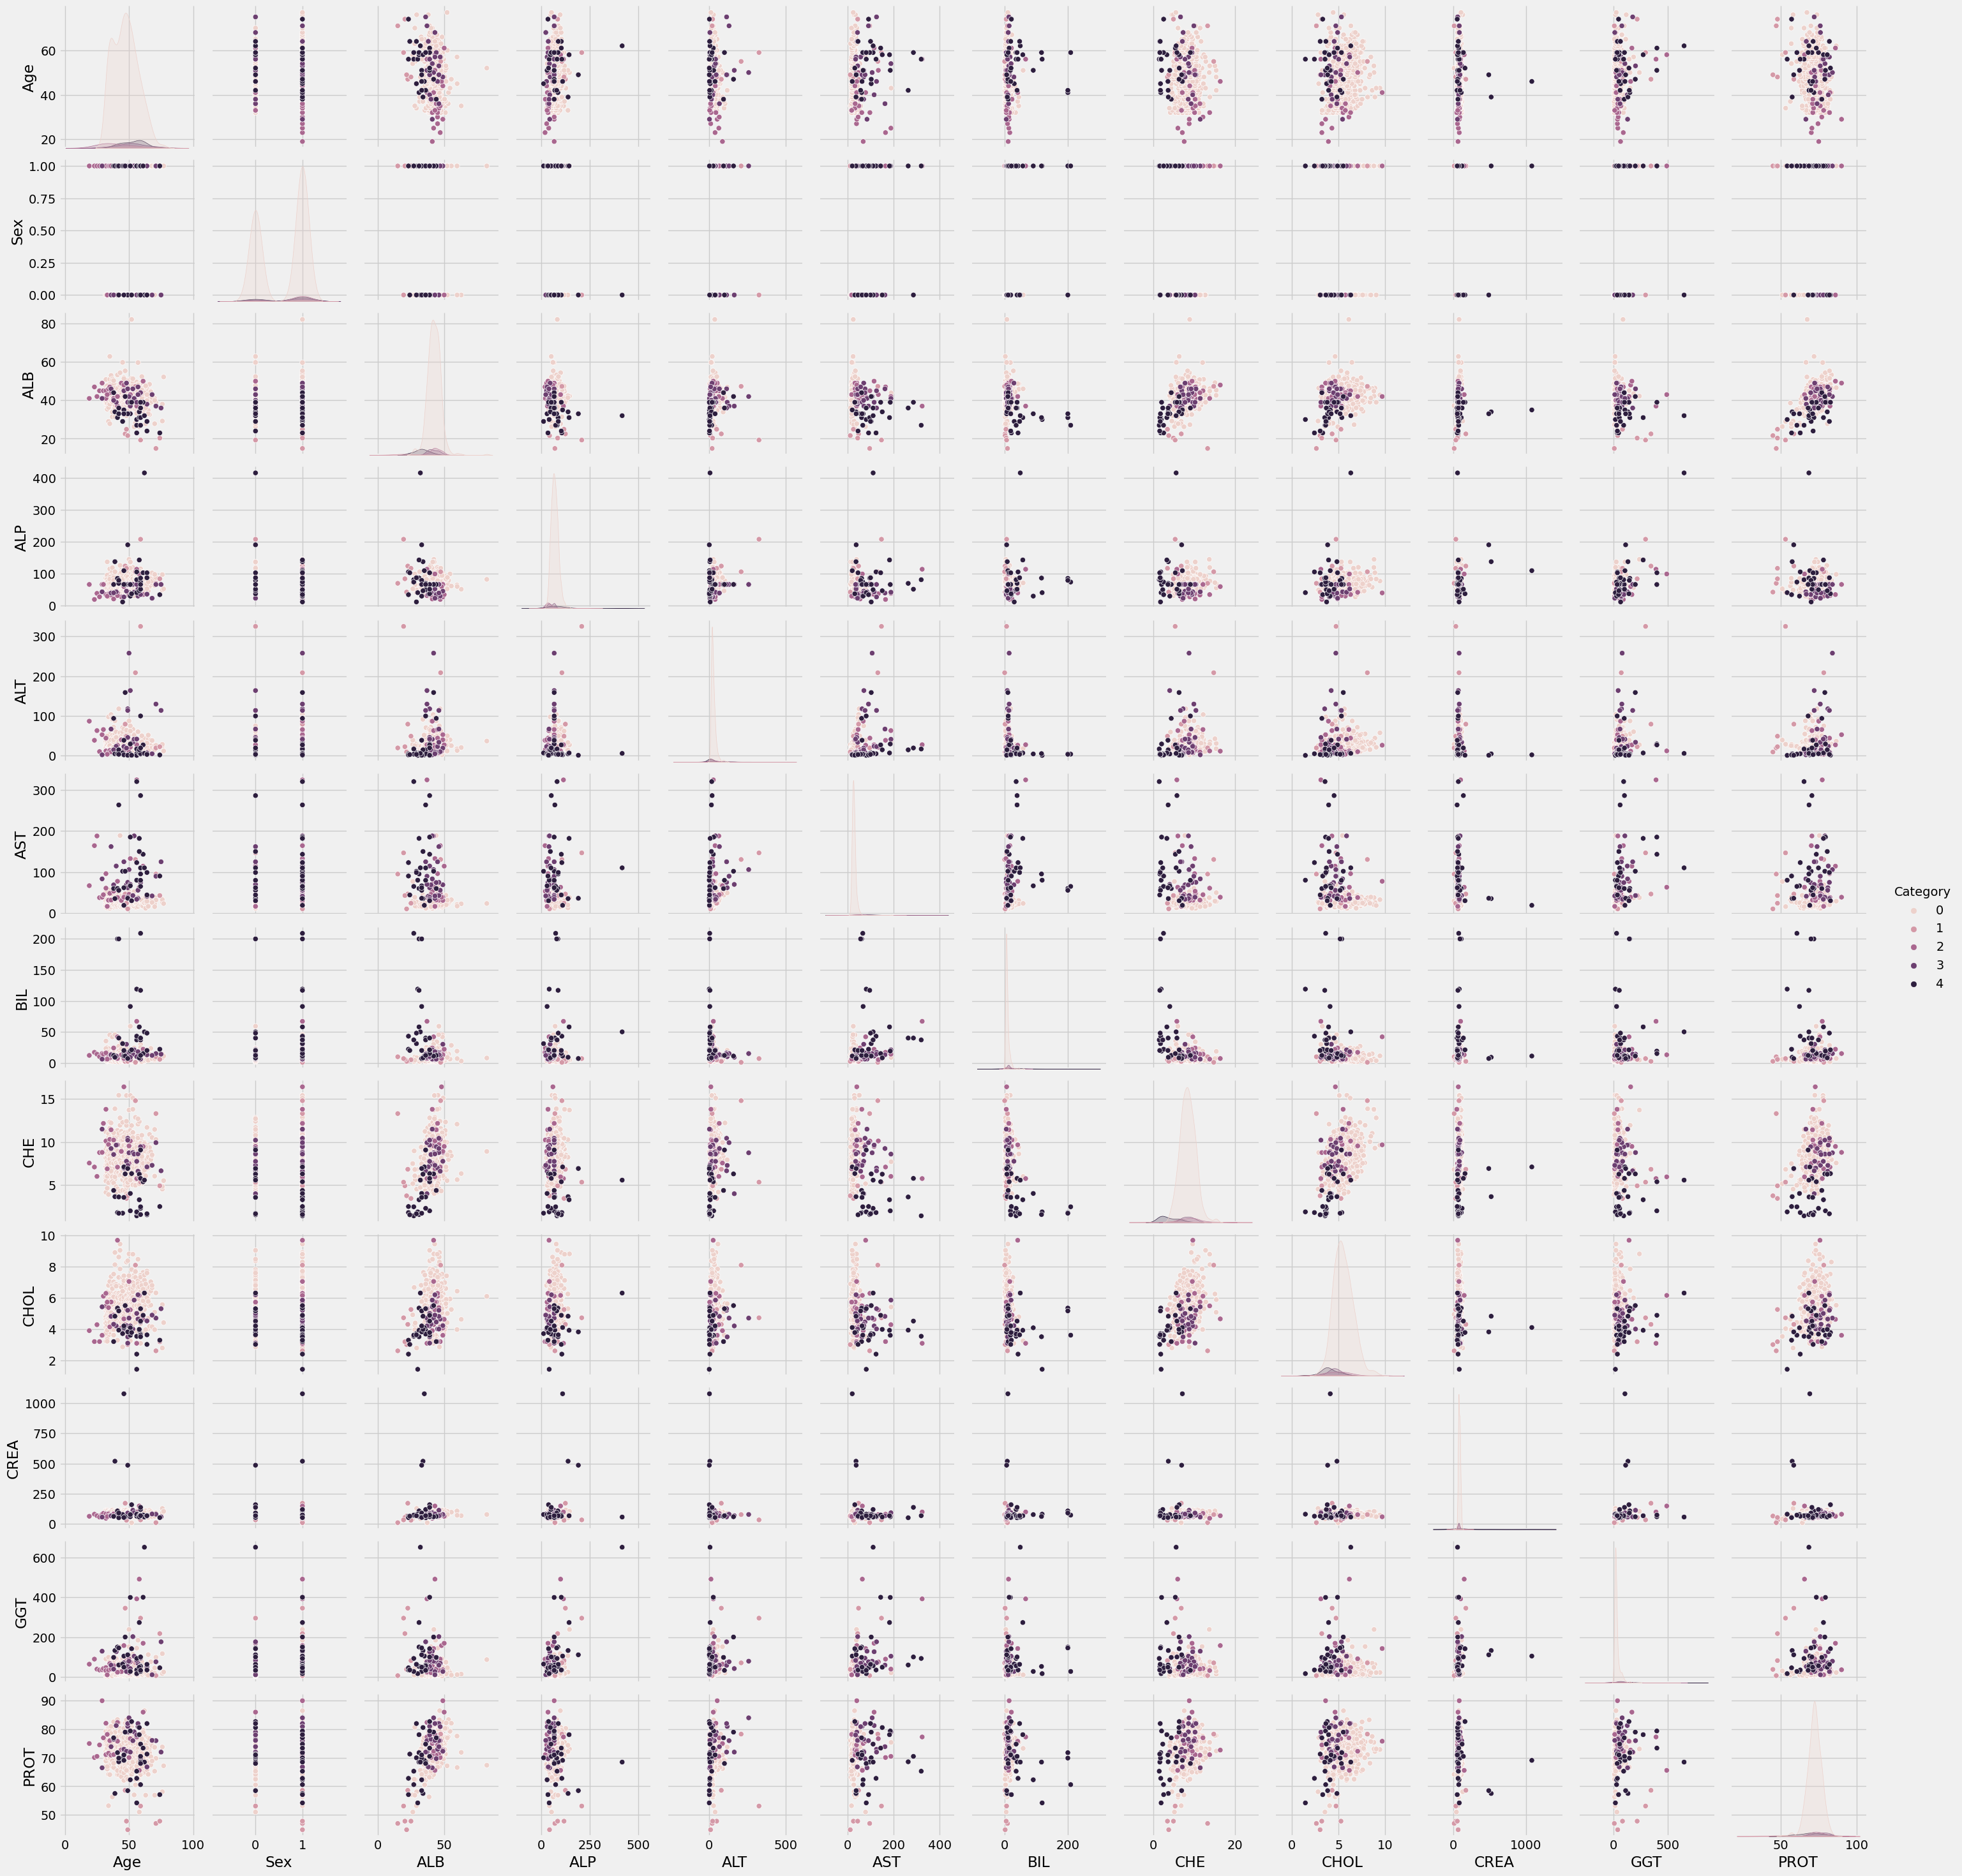

In [23]:
sns.pairplot(HepaC, hue="Category")

# Data Smoting

In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X,y = smote.fit_resample(X,y)
print("X shape ",X.shape)
print("y shape ",y.shape)

X shape  (2665, 12)
y shape  (2665,)


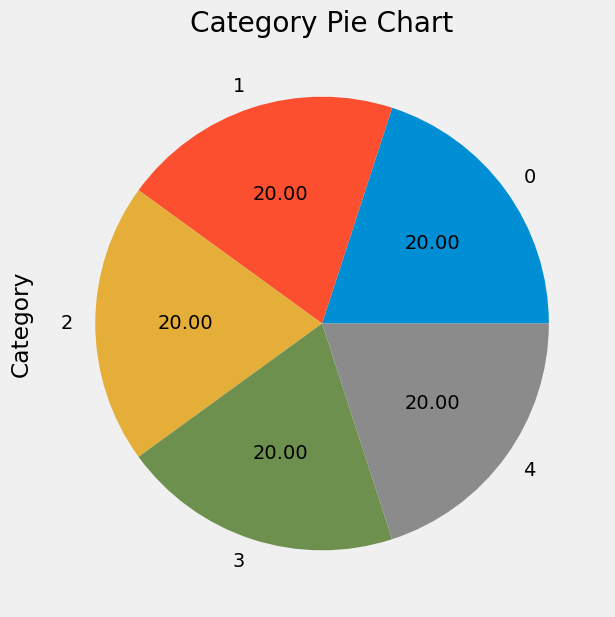

0    533
1    533
2    533
3    533
4    533
Name: Category, dtype: int64

In [25]:
#Balancin the dataset
plt.figure(figsize=(7,7))
y.value_counts().plot(kind='pie',autopct='%.2f',)
plt.title('Category Pie Chart')
plt.show()
y.value_counts()

# Scaling

In [26]:
numeric_columns = []
for col in HepaC.columns:
    if HepaC[col].dtype == 'int64' or HepaC[col].dtype == 'float64':
        numeric_columns.append(col)

In [27]:
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()
HepaC[numeric_columns] =ssc.fit_transform(HepaC[numeric_columns])

In [28]:
HepaC.head()

Category       Age       Sex       ALB       ALP       ALT       AST  \
0 -0.361201 -1.533722  0.797724 -0.550964 -0.613197 -0.812461 -0.379878   
1 -0.361201 -1.533722  0.797724 -0.550964  0.079856 -0.407746 -0.301052   
2 -0.361201 -1.533722  0.797724  0.918274  0.251173  0.307382  0.544813   
3 -0.361201 -1.533722  0.797724  0.271109 -0.632665  0.087343 -0.364719   
4 -0.361201 -1.533722  0.797724 -0.428528  0.227811  0.165928 -0.298020   

        BIL       CHE      CHOL      CREA       GGT      PROT  
0 -0.205131 -0.582446 -1.898763  0.496645 -0.498726 -0.565687  
1 -0.415827  1.352217 -0.503252 -0.145698 -0.434542  0.826465  
2 -0.287068  0.289065 -0.147708  0.095181 -0.111786  1.346202  
3  0.462075 -0.399931 -0.556584 -0.025259 -0.100783  0.677969  
4 -0.082224  0.430514 -0.929905 -0.105552 -0.172303 -0.621373

In [29]:
#spliting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=25, test_size =0.2)

In [30]:
y_train.value_counts(normalize=True)*100

1    20.590994
4    20.168856
3    19.793621
2    19.746717
0    19.699812
Name: Category, dtype: float64

In [31]:
y_test.value_counts(normalize =True)*100

0    21.200750
2    21.013133
3    20.825516
4    19.324578
1    17.636023
Name: Category, dtype: float64

In [32]:
#stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=25, test_size =0.2, stratify = y)

In [33]:
import os
from pathlib import Path

IMAGES_PATH = Path() / "images" / "Data Preprocessing"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [34]:
y_train.value_counts(normalize=True)*100

1    20.028143
0    20.028143
4    19.981238
2    19.981238
3    19.981238
Name: Category, dtype: float64

In [35]:
y_test.value_counts(normalize =True)*100

4    20.075047
3    20.075047
2    20.075047
0    19.887430
1    19.887430
Name: Category, dtype: float64

In [36]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2132, 12) (2132,) (533, 12) (533,)


# K-nearest neighbour

In [37]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = [int(x) for x in np.linspace(start = 5, stop = 25, num = 10)]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree','kd_tree','brute']
# Create the random grid
random_grid = {'n_neighbors': n_neighbors,
               'weights': weights,
               'algorithm': algorithm,}
print(random_grid)

{'n_neighbors': [5, 7, 9, 11, 13, 16, 18, 20, 22, 25], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}


Hyperparameter Tuning for "KNN"

In [38]:
knn=KNeighborsClassifier()
knn_randomcv=RandomizedSearchCV(estimator=knn,param_distributions=random_grid,n_iter=100,cv =3,verbose=2,n_jobs=-1)

knn_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [5, 7, 9, 11, 13, 16, 18,
                                                        20, 22, 25],
                                        'weights': ['uniform', 'distance']},
                   verbose=2)

In [39]:
knn_randomcv.best_params_

{'weights': 'distance', 'n_neighbors': 5, 'algorithm': 'auto'}

In [40]:
knn_final=knn_randomcv.best_estimator_
knn_final.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

In [41]:
y_pred = knn_final.predict(X_test)

In [42]:
print('Train Accuracy ', accuracy_score(y_train, knn_final.predict(X_train)))
knn_test_acc = accuracy_score(y_test, y_pred)
print('Test Accuracy ',knn_test_acc)
print('Test Report :\n',classification_report(y_test, y_pred))

Train Accuracy  1.0
Test Accuracy  0.9793621013133208
Test Report :
               precision    recall  f1-score   support

           0       1.00      0.93      0.97       106
           1       0.98      1.00      0.99       106
           2       0.98      0.98      0.98       107
           3       0.94      0.99      0.96       107
           4       1.00      0.99      1.00       107

    accuracy                           0.98       533
   macro avg       0.98      0.98      0.98       533
weighted avg       0.98      0.98      0.98       533



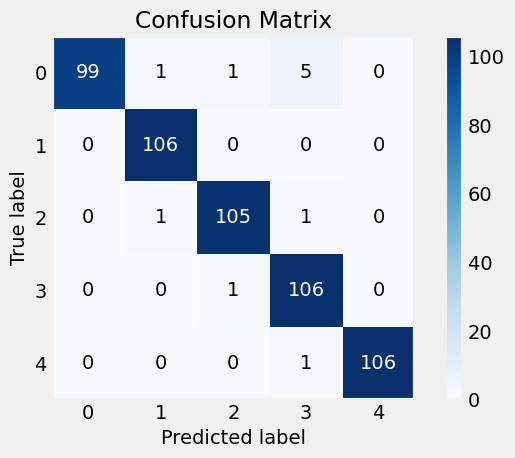

In [43]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix knn')

# Decision tree

In [44]:
from sklearn.tree import DecisionTreeClassifier 
criterion = ['gini','entropy','log_loss']
splitter = ['best','random']
max_depth = [3,4,5,6]
# Create the random grid
random_grid = {'criterion': criterion,
               'splitter': splitter,
               'max_depth': max_depth,}
print(random_grid)

{'criterion': ['gini', 'entropy', 'log_loss'], 'splitter': ['best', 'random'], 'max_depth': [3, 4, 5, 6]}


Hyperparameter Tuning for "Decision Tree"

In [45]:
dtree = DecisionTreeClassifier()
dtree_randomcv=RandomizedSearchCV(estimator=dtree,param_distributions=random_grid,n_iter=100,cv =3,verbose=2,
                                  n_jobs=-1)

dtree_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 4, 5, 6],
                                        'splitter': ['best', 'random']},
                   verbose=2)

In [46]:
dtree_randomcv.best_params_

{'splitter': 'best', 'max_depth': 6, 'criterion': 'entropy'}

In [47]:
dtree_final = dtree_randomcv.best_estimator_
dtree_final.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [48]:
y_pred = dtree_final.predict(X_test)

In [49]:
print('Train Accuracy ', accuracy_score(y_train, dtree_final.predict(X_train) ))
dtree_test_acc = accuracy_score(y_test, y_pred)
print('Test Accuracy ', dtree_test_acc)
print('Test Report :\n',classification_report(y_test,y_pred))

Train Accuracy  0.9287054409005628
Test Accuracy  0.900562851782364
Test Report :
               precision    recall  f1-score   support

           0       1.00      0.95      0.98       106
           1       1.00      1.00      1.00       106
           2       0.87      0.68      0.76       107
           3       0.72      0.93      0.81       107
           4       0.97      0.93      0.95       107

    accuracy                           0.90       533
   macro avg       0.91      0.90      0.90       533
weighted avg       0.91      0.90      0.90       533



In [50]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_tree"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [51]:
from sklearn.tree import export_graphviz

export_graphviz(
        dtree_final,
        out_file=str(IMAGES_PATH / "hepatitisC.dot"), 
        feature_names=X_train.columns,
        class_names=['0','1','2','3','4'],
        rounded=True,
        filled=True
    )

In [52]:
from IPython import display

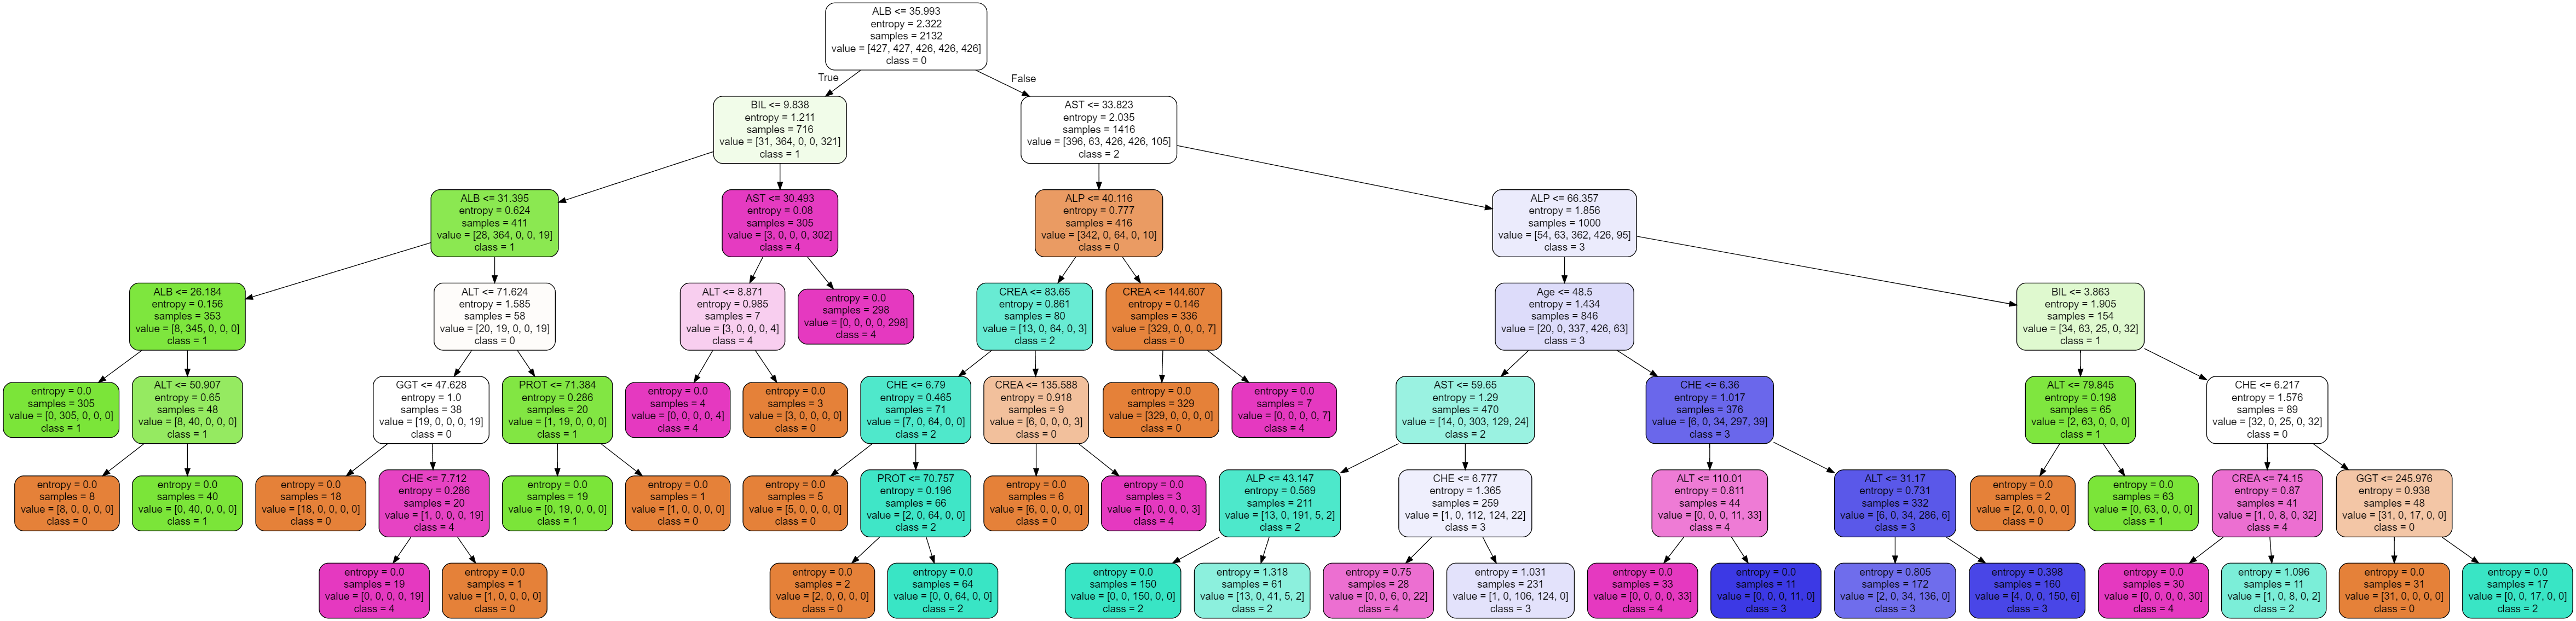

In [53]:
display.Image(IMAGES_PATH / 'dtree.png')

Max Depth =  1 , Train Acc. =  0.379 , Test Acc. =  0.358
Max Depth =  2 , Train Acc. =  0.68 , Test Acc. =  0.662
Max Depth =  3 , Train Acc. =  0.797 , Test Acc. =  0.78
Max Depth =  4 , Train Acc. =  0.834 , Test Acc. =  0.816
Max Depth =  5 , Train Acc. =  0.89 , Test Acc. =  0.863
Max Depth =  6 , Train Acc. =  0.936 , Test Acc. =  0.891
Max Depth =  7 , Train Acc. =  0.962 , Test Acc. =  0.932
Max Depth =  8 , Train Acc. =  0.971 , Test Acc. =  0.938
Max Depth =  9 , Train Acc. =  0.983 , Test Acc. =  0.946
Max Depth =  10 , Train Acc. =  0.992 , Test Acc. =  0.955
Max Depth =  11 , Train Acc. =  0.995 , Test Acc. =  0.97
Max Depth =  12 , Train Acc. =  0.997 , Test Acc. =  0.968
Max Depth =  13 , Train Acc. =  0.999 , Test Acc. =  0.976
Max Depth =  14 , Train Acc. =  1.0 , Test Acc. =  0.97
Max Depth =  15 , Train Acc. =  1.0 , Test Acc. =  0.97
Max Depth =  16 , Train Acc. =  1.0 , Test Acc. =  0.966
Max Depth =  17 , Train Acc. =  1.0 , Test Acc. =  0.977
Max Depth =  18 , Tr

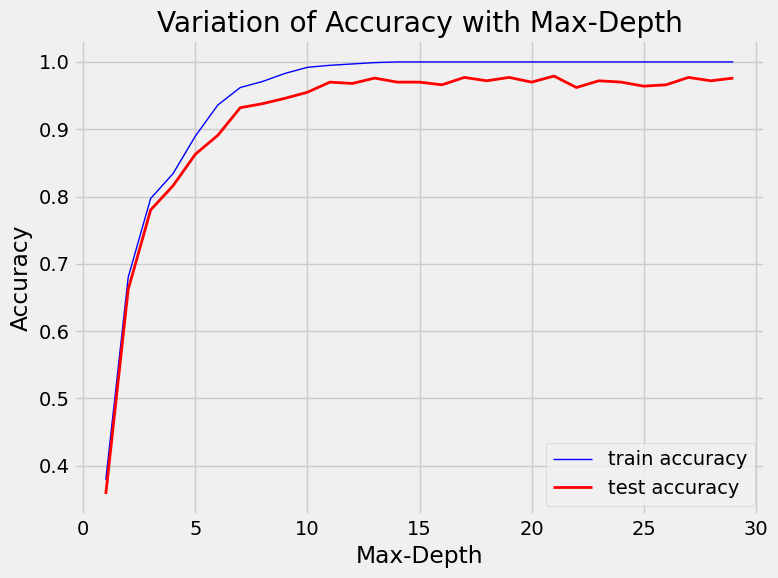

In [54]:
import matplotlib.pyplot as plt
train_acc = []
test_acc = []
max_depth =[]

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)).round(3))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)).round(3))
    max_depth.append(depth)

for i in range(1, 30):
    print('Max Depth = ', i, ', Train Acc. = ', train_acc[i-1], ', Test Acc. = ' ,
         test_acc[i-1])

plt.figure(figsize = (8,6))
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max-Depth')
plt.plot(max_depth, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(max_depth, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against max_depth')
plt.show();

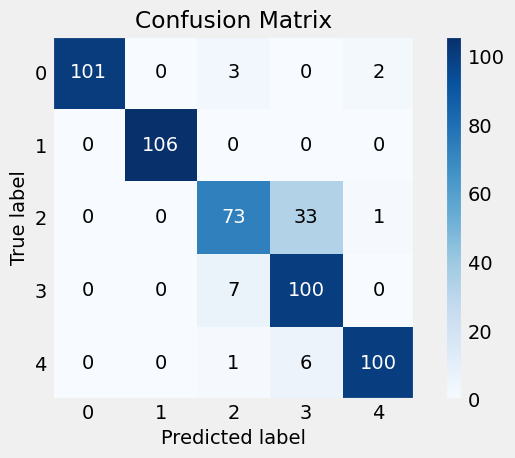

In [55]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix desicion tree')

# Random forest

In [56]:
from sklearn.ensemble import RandomForestClassifier 

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


Hyperparameter tuning for **Random Forest**

In [57]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [58]:
rf_randomcv.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 560,
 'criterion': 'entropy'}

In [59]:
rf_final = rf_randomcv.best_estimator_
rf_final.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=560, max_features='sqrt',
                       min_samples_split=5, n_estimators=800)

In [60]:
y_pred= rf_final.predict(X_test)

In [61]:
print('Train Accuracy ', accuracy_score(y_train, rf_final.predict(X_train) ))
rf_test_acc = accuracy_score(y_test, y_pred)
print('Test Accuracy ', rf_test_acc)
print('Test report :\n',classification_report(y_test,y_pred))

Train Accuracy  1.0
Test Accuracy  0.9906191369606003
Test report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       106
           2       0.99      1.00      1.00       107
           3       0.96      0.99      0.98       107
           4       1.00      0.96      0.98       107

    accuracy                           0.99       533
   macro avg       0.99      0.99      0.99       533
weighted avg       0.99      0.99      0.99       533



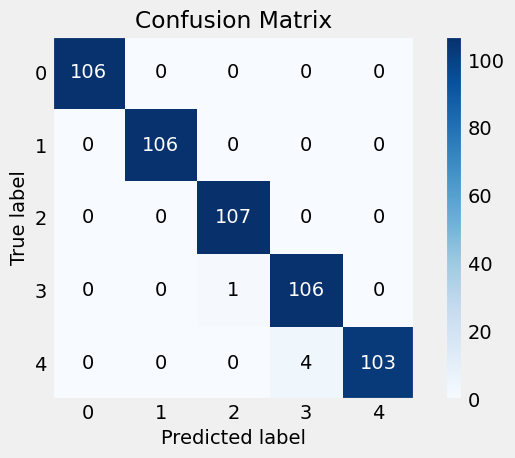

In [62]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix random forest')

# Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression 

penalty = ['l1','l2','elasticnet']
solver = ['lbfgs', 'liblinear','newton-cg','newton-cholesky','sag','saga']
max_iter = [int(x) for x in np.linspace(10, 100,10)]
multi_class = ['ovr']
class_weight = ['dict','balanced']
C = [int(x) for x in np.linspace(1, 6,5)]
# Create the random grid
random_grid = {'penalty': penalty,
               'solver': solver,
               'max_iter': max_iter,
               'multi_class': multi_class,
               'class_weight': class_weight,
               'C':C}
print(random_grid)

{'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 'max_iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'multi_class': ['ovr'], 'class_weight': ['dict', 'balanced'], 'C': [1, 2, 3, 4, 6]}


Hyperparameter Tuning for **Logistic Regression**

In [64]:
lr=LogisticRegression ()
lr_randomcv=RandomizedSearchCV(estimator=lr, param_distributions=random_grid, n_iter=100, cv=3, verbose=2,
                               random_state=100,n_jobs=-1)

lr_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [1, 2, 3, 4, 6],
                                        'class_weight': ['dict', 'balanced'],
                                        'max_iter': [10, 20, 30, 40, 50, 60, 70,
                                                     80, 90, 100],
                                        'multi_class': ['ovr'],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   random_state=100, verbose=2)

In [65]:
lr_randomcv.best_params_

{'solver': 'liblinear',
 'penalty': 'l2',
 'multi_class': 'ovr',
 'max_iter': 40,
 'class_weight': 'balanced',
 'C': 1}

In [66]:
lr_final = lr_randomcv.best_estimator_
lr_final.fit(X_train,y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=40, multi_class='ovr',
                   solver='liblinear')

In [67]:
y_pred= lr_final.predict(X_test)

In [68]:
print('Train Accuracy ', accuracy_score(y_train, lr_final.predict(X_train) ))
lr_test_acc = accuracy_score(y_test, y_pred)
print('Test Accuracy ', lr_test_acc)
print(classification_report(y_test,y_pred))

Train Accuracy  0.9052532833020638
Test Accuracy  0.8893058161350844
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       106
           1       1.00      1.00      1.00       106
           2       0.80      0.75      0.77       107
           3       0.75      0.85      0.79       107
           4       0.98      0.90      0.94       107

    accuracy                           0.89       533
   macro avg       0.89      0.89      0.89       533
weighted avg       0.89      0.89      0.89       533



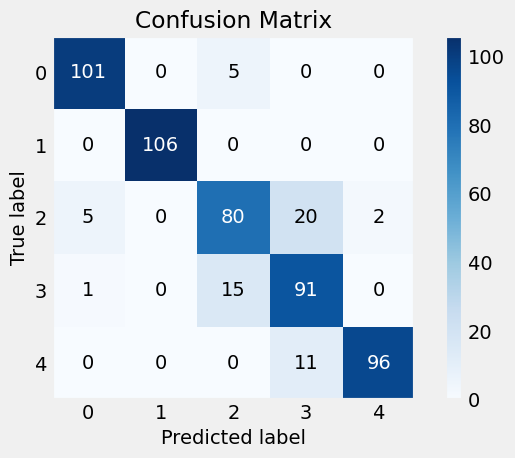

In [69]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix log-reg')

# Support Vector Machine

In [70]:
from sklearn.svm import SVC

C = [int(x) for x in np.linspace(1, 6,5)]
kernel = ['linear','poly','rbf','sigmoid']
gamma = ['scale', 'auto',' float']
degree = [2,3,4,5]
max_iter = [int(x) for x in np.linspace(10, 100,10)]
class_weight = ['dict','balanced']

# Create the random grid
random_grid = {'C': C,
               'kernel': kernel,
               'gamma': gamma,
               'degree': degree,
               'max_iter': max_iter,
               'class_weight': class_weight,
               }
print(random_grid)

{'C': [1, 2, 3, 4, 6], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto', ' float'], 'degree': [2, 3, 4, 5], 'max_iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'class_weight': ['dict', 'balanced']}


Hyperparameter Tuning for **Support Vector Machine**

In [71]:
svm=SVC()
svm_randomcv=RandomizedSearchCV(estimator=svm, param_distributions=random_grid, n_iter=100, cv=3, verbose=2,
                               random_state=100,n_jobs=-1)

svm_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [1, 2, 3, 4, 6],
                                        'class_weight': ['dict', 'balanced'],
                                        'degree': [2, 3, 4, 5],
                                        'gamma': ['scale', 'auto', ' float'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'max_iter': [10, 20, 30, 40, 50, 60, 70,
                                                     80, 90, 100]},
                   random_state=100, verbose=2)

In [72]:
svm_randomcv.best_params_

{'max_iter': 100,
 'kernel': 'rbf',
 'gamma': 'auto',
 'degree': 3,
 'class_weight': 'balanced',
 'C': 2}

In [73]:
svm_final = svm_randomcv.best_estimator_
svm_final.fit(X_train,y_train)

SVC(C=2, class_weight='balanced', gamma='auto', max_iter=100)

In [74]:
y_pred= svm_final.predict(X_test)

In [75]:
print('Train Accuracy ', accuracy_score(y_train, svm_final.predict(X_train) ))
svm_test_acc = accuracy_score(y_test, y_pred)
print('Test Accuracy ', svm_test_acc)
print(classification_report(y_test,y_pred))

Train Accuracy  0.9521575984990619
Test Accuracy  0.9043151969981238
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       106
           1       1.00      0.95      0.98       106
           2       1.00      0.93      0.96       107
           3       1.00      0.93      0.97       107
           4       1.00      0.71      0.83       107

    accuracy                           0.90       533
   macro avg       0.94      0.90      0.91       533
weighted avg       0.94      0.90      0.91       533



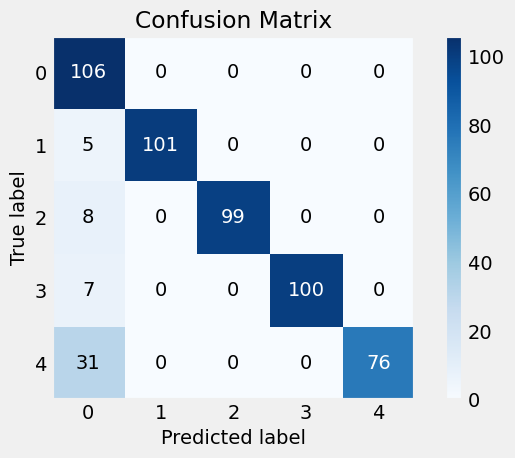

In [76]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix svm')

# Voting classifier (hard voting)

In [77]:
from sklearn.ensemble import  VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('knear', knn_final),
        ('log_reg', lr_final),
        ('dt', dtree_final),
        ('svc', svm_final)
    ], 
    voting = 'hard'
)

In [78]:
for clf in [knn_final, lr_final, dtree_final, svm_final, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.9793621013133208
LogisticRegression 0.8893058161350844
DecisionTreeClassifier 0.8986866791744841
SVC 0.9043151969981238
VotingClassifier 0.9849906191369606


# ADA boosting

In [79]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4), n_estimators=10,
    learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
ada_test_acc = accuracy_score(y_test, y_pred)
ada_test_acc

0.9606003752345216

# Model Comparison

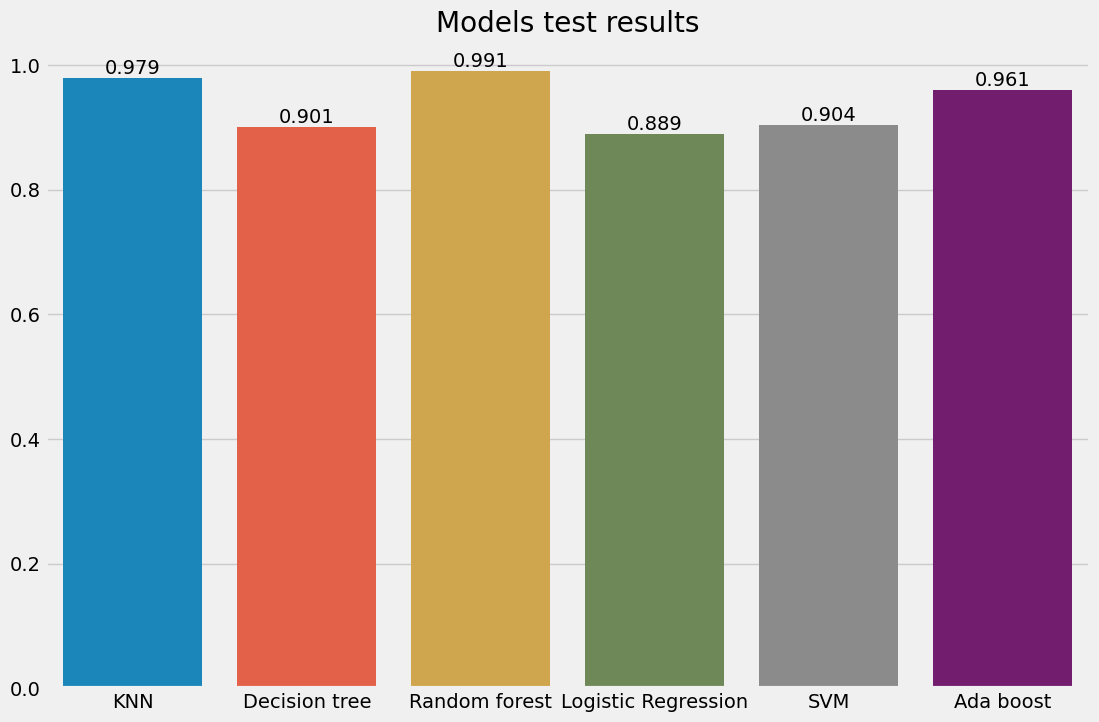

In [80]:
model_names = ['KNN','Decision tree','Random forest','Logistic Regression','SVM','Ada boost']
model_acc =[knn_test_acc,dtree_test_acc,rf_test_acc,lr_test_acc,svm_test_acc,ada_test_acc]
#colours = ['#11992E','#996A11','#991B11','#118299','#565158']

plt.figure(figsize=(12, 8))
plt.title("Models test results")
ax = sns.barplot(model_names,x=model_names, y=model_acc,)
ax.bar_label(ax.containers[0],fmt='%.3f');

# Explainable AI

In [81]:
from interpret.blackbox import LimeTabular
import lime
from interpret import show

In [82]:
# lime = LimeTabular(predict_fn=rf_final.predict_proba, 
#                    data=X_train, 
#                    random_state=1)
# lime_local = lime.explain_local(X_test[-20:], 
#                                 y_test[-20:], 
#                                 name='LIME')
# show(lime_local)

In [83]:
import lime
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(
    training_data = np.array(X_train),
    feature_names =X_train.columns,
    mode = 'classification'
)

In [84]:
exp = interpretor.explain_instance(
    data_row = X_test.iloc[10],
    predict_fn = rf_final.predict_proba
)
exp.show_in_notebook(show_table=True,show_all =False)